# L1-Regularization. Dimensionality Reduction

In [48]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We would like to reduce the number of features in the dataset.
One way to select column is to use a specific type of regularization in Logistic Regression. L1-Regularization.

# L1- Regularization

In [49]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2)

In [50]:
lr_unreg = LogisticRegression(penalty=None)
lr_reg_l2 = LogisticRegression(penalty='l2', C=0.01)
lr_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lr_unreg.fit(X, y)
lr_reg_l2.fit(X, y)
lr_reg_l1.fit(X, y)

print(lr_unreg.coef_[0])
print(lr_reg_l2.coef_[0])
print(lr_reg_l1.coef_[0])

[ 0.1928219  -0.07488725  1.08782449 -1.1842514  -0.05070431  0.056216
 -0.82983644 -0.3238711  -0.58890792 -0.57191388]
[ 0.12366421  0.03734114  0.43076237 -0.41240264  0.07188048  0.1304351
 -0.44951361 -0.25383033 -0.37207731 -0.29956163]
[ 0.          0.          0.11585752 -0.16879075  0.          0.01876396
 -0.48136196 -0.13789802 -0.14866362 -0.10160214]


L1: 0 as a weight -> the feature can be discarded

## L1 Regularization: Feature Selection

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.11582861 -0.16876838  0.          0.01878503
  -0.48134711 -0.13790998 -0.14864916 -0.10160982]
 [ 0.          0.          0.71771951 -0.9804621   0.04437261  0.
  -0.98432084 -0.10103328 -0.48716688 -0.44507089]
 [ 0.         -0.07456714  0.90064778 -1.18572056  0.03510262  0.
  -1.10481592 -0.14251037 -0.54789955 -0.57552156]
 [ 0.0633768  -0.05194273  0.94714952 -1.22906362  0.0639587  -0.01659943
  -1.06018741 -0.14398084 -0.59497055 -0.54829345]
 [ 0.38565667  0.07091766  1.1094532  -1.27761146  0.13798436 -0.04915509
  -0.70441483 -0.21293089 -0.75741603 -0.38221176]
 [ 0.12564864 -0.01363952  0.96521577 -1.25603699  0.10880921 -0.04214894
  -1.01247319 -0.1248531  -0.64227082 -0.49823247]
 [ 0.02197766 -0.04307827  0.903

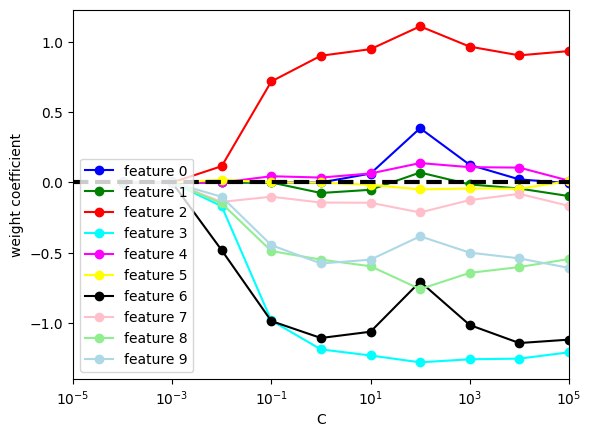

In [51]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr_clf = LogisticRegression(penalty='l1', solver='liblinear', C=10.**c)
    lr_clf.fit(X,y)
    weights.append(lr_clf.coef_[0])
    params.append(10.**c)
weights = np.array(weights) # we need array for the range()
print(weights)
for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(params, weights[:, column], label=f'feature {column}', color=color, marker='o')
ax.axhline(0, color='black', linestyle='--', linewidth=3)
ax.set_xlim([10**(-5), 10**5])
ax.set_ylabel('weight coefficient')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.legend(loc='lower left')

For each value of C it shows the trend for the weight associated with a specific feature.


# Dimensionality Reduction

## Dimensionality Reduction by Feature Selection

In SKLearn, Sequential Feature Selection - SFS - is available in the SequentialFeatureSelector transformer in the package sklearn.feature_selection. 
SFS can be either forward or backward.

However, we will use the implementation released in the library mlxtend, made by Sebastian Raschka. Through this library we are able to access the steps and evaluate the performance during the feature selection process.

We can import the transformer SequentialFeatureSelector and apply it to the famous Wine Dataset.
In this dataset each instance is a type of wine and it is described by a set of  measurements related to the properties of the wine. The label (1, 2, 3) indicates the quality of the wine: medium, good, excellent. The task is to predict the taste of the wine given the set of properties of the wine.


In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

df_wine = pd.read_csv('data/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
y = df_wine['Class label']
feature_matrix = df_wine.drop(['Class label'], axis=1)
feature_matrix.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, stratify=y, train_size=0.1)
ct = ColumnTransformer(
    [('all', StandardScaler(), X_train.columns)],
    verbose_feature_names_out=False,
    remainder='drop'
)
ct.fit(X_train)
X_train_std = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())
ct.transform(X_test)

array([[-2.68349293, -1.30804409,  0.66831015, ...,  0.72027939,
        -0.61914622, -1.09031109],
       [-1.67574534, -0.13814836, -1.72353671, ...,  1.6332651 ,
         0.41745465, -0.12671349],
       [ 0.4299959 , -0.49610153,  1.08688335, ..., -2.12608784,
        -1.46437463, -0.4409301 ],
       ...,
       [-0.21676748, -0.51356266,  0.81780058, ...,  0.82768947,
        -0.30019211,  1.25234828],
       [-0.21676748, -0.44371814, -0.70700179, ...,  0.82768947,
         0.33771612,  1.40945658],
       [ 1.40766147,  1.62542582,  1.38586421, ..., -1.91126767,
        -1.75143333, -0.65040784]])

Now, we can run the feature selection algorithm. We use the forward selection till reaching k=8. As performance measure we set the accuracy.

In [54]:
sfs1 = SFS(Perceptron(), # we define classifer to train and get the prediction
           k_features=8, # number of features we want (so, instead of 13 we want 8)
           forward=True, # forward selection, otherwise False for backward selection
           scoring='accuracy', # performance measure
           cv=0 # cross validation 
           ) 
# basically, we obtain the predictor we key features
sfs1.fit(X_train_std, y_train)

SequentialFeatureSelector(cv=0, estimator=Perceptron(), k_features=(8, 8),
                          scoring='accuracy')

We can get the performance obtained by adding the selected feature f^+ through the method get_metric_dict(). It returns a dictionary whose keys are the iteration over k and the values contain a set of statistics and the average performance measure.
We exploit this information to draw the trend of performance by increasing the number of selected features.

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Performance measure')

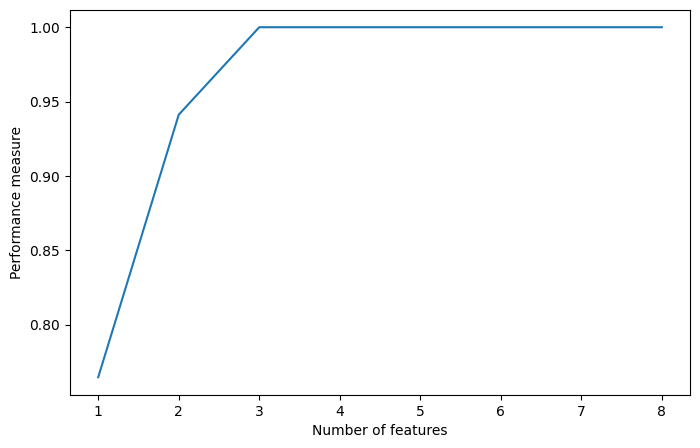

In [55]:
scores = sfs1.get_metric_dict()
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.plot(list(scores.keys()), [v['avg_score'] for v in scores.values()])
ax.set_xlabel('Number of features')
ax.set_ylabel('Performance measure')

We apply the backward selection by simply setting the parameter forward to False.

In [56]:
sfs2 = SFS(Perceptron(),
           k_features=1,
           forward=False,
           scoring='accuracy',
           cv=0)
sfs2.fit(X_train_std, y_train)

SequentialFeatureSelector(cv=0, estimator=Perceptron(), forward=False,
                          k_features=(1, 1), scoring='accuracy')

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Performance measure')

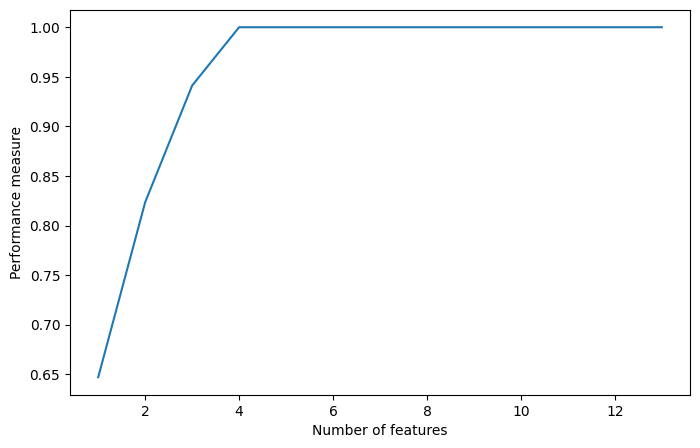

In [57]:
scores = sfs2.get_metric_dict()
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.plot(list(scores.keys()), [v['avg_score'] for v in scores.values()])
ax.set_xlabel('Number of features')
ax.set_ylabel('Performance measure')

- PCA technique is made of the following steps:
    1. Standardize the d-dimensional dataset
    2. Construct the **covariance matrix**
    3. Decompose the covariance matrix into its eigenvectors and eigenvalues
    4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors (directions of variance)
    5. Select the k eigenvectors that correspond to the largest eigenvalues, i.e. the directions with the largest variance
    6. From the select k eigenvectors, build a projection matrix W
    7. Transform the ordinal d-dimensional dataset into a new k-dimensional dataset by applying the projection W

In the following code we can see in details steps by exploiting the basic functions provided by Python.

Step 1: Standardize the d-dimensional dataset
- It simplifies the computation of covariant matrix
- It represents the easiest step, since it asks for the application of the class StandradScaler to each feature.

In [58]:
X, y = df_wine.iloc[:,1:], df_wine.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [59]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Step 2: Construct the covariance matrix
- In Python, the covariance matrix is computed by the function np.cov.

In [60]:
cov_matrix = np.cov(X_train_std.T)
cov_matrix

array([[ 1.00813008,  0.14257604,  0.21689434, -0.29765621,  0.30174053,
         0.27099929,  0.21602191, -0.18880701,  0.16886714,  0.55210958,
        -0.07455516,  0.01693496,  0.65081559],
       [ 0.14257604,  1.00813008,  0.15788648,  0.2778185 , -0.01017635,
        -0.36218453, -0.45658621,  0.2741429 , -0.2014637 ,  0.32555647,
        -0.60814364, -0.40468808, -0.18283758],
       [ 0.21689434,  0.15788648,  1.00813008,  0.43437884,  0.28307595,
         0.23035632,  0.24552358,  0.15792419,  0.06018699,  0.28092307,
        -0.00474747,  0.08462822,  0.21755982],
       [-0.29765621,  0.2778185 ,  0.43437884,  1.00813008, -0.05955771,
        -0.27244522, -0.27243452,  0.34249164, -0.17100514, -0.00998964,
        -0.22919827, -0.18390993, -0.41412709],
       [ 0.30174053, -0.01017635,  0.28307595, -0.05955771,  1.00813008,
         0.24605194,  0.22866399, -0.2996633 ,  0.16421755,  0.32361004,
         0.04962748,  0.05086319,  0.39576236],
       [ 0.27099929, -0.362184

Step 3: Decompose the covariance matrix into its eigenvectors and eigenvalues
- Eigenvectors of the covariance matrix represent the principal component = directions of maximum variance and their eigenvalues indicate the magnitude.
- In Python, we use the function np.linalg.eig which returns the eigenvalues and their respective eigenvectors.

In [61]:
eigen_vals, eigen_vect = np.linalg.eig(cov_matrix)

Eigendecomposition is the factorization of a square matrix into eigenvalues and eigenvectors. In the case of PCA, the covariance matrix is symmetric and positive semi-definite.
In PCA, the eigenvector associated with the highest eigenvalue corresponds to the direction of maximum variance of the dataset. In general, the eigenvalues define the amount of information their associated eigenvectors hold. So...

SORT THE EIGENVALUES TO RANK THE CORRESPONDING EIGENVECTORS.

We sort the eigenvalues by decreasing magnitude because we are interested in finding the top k eigenvectors which define the projection matrix W.
Before finding the eigenvectors, it is interesting to plot the explained variance ratio.

In Python...

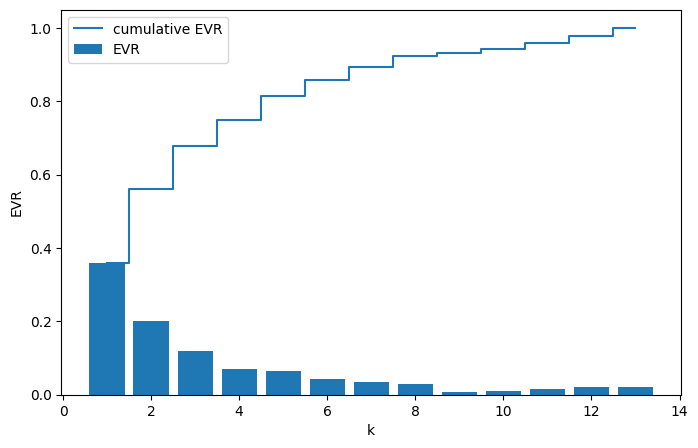

In [62]:
tot = np.sum(eigen_vals)
evr = [lam/tot for lam in eigen_vals]
cum_evr = np.cumsum(evr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.bar(range(1, len(eigen_vals) + 1), evr, align='center', label='EVR')
ax.step(range(1, len(eigen_vals) + 1), cum_evr, where='mid', label='cumulative EVR')
ax.set_xlabel('k')
ax.set_ylabel('EVR')
ax.legend(loc='upper left')

The first two eigenvalues explain about 60% of the variance in the dataset (1 + 2). So by using just a 2-dimensional space we can retain about 60% of the information in the original dataset.
If we want to lose 10 % of information, then we have to select k = 7.
In practice, by computing EVR we have two options:
1. Get the quantity of the information having fixed the dimension k of our new subspace.
2. Select the dimension k of the new lower-dimensional subspace, if we fix the information we want to hold.

Now we have to define how to transform our original datapoint onto the new subspace.

Step 5 and 6: Select the k eigenvectors that correspond to the largest eigenvalues and build a projection matrix W.

- First, we sort the eigenvectors by their eigenvalues and select the top k. in our case we select k=2 for visualization reasons.

In [63]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vect[:, i]) for i in range(len(eigen_vals))]

In [64]:
eigen_pairs.sort(key=lambda k:k[0], reverse=True)
eigen_pairs

[(4.709553901660297,
  array([-0.14119433,  0.24946815, -0.05104853,  0.19890851, -0.1444494 ,
         -0.40472564, -0.42654202,  0.29573373, -0.32620144,  0.07420694,
         -0.29277478, -0.37482201, -0.2889145 ])),
 (2.636064710802363,
  array([ 0.46732089,  0.26876924,  0.27660192, -0.01955098,  0.32120489,
          0.04839313, -0.00936768,  0.00146817,  0.04087554,  0.53982087,
         -0.27536907, -0.19149315,  0.34828709])),
 (1.5572875825492214,
  array([ 0.18497972, -0.11558438, -0.62580603, -0.63022498, -0.06808315,
         -0.14454263, -0.16109721, -0.20830498, -0.10392829,  0.07463025,
         -0.04770525, -0.16694498,  0.14905602])),
 (0.9342266236726285,
  array([-0.06135175,  0.50736306, -0.23358668,  0.06619111, -0.21808618,
          0.10100723,  0.07511595, -0.33032862,  0.45117801, -0.01323281,
         -0.46488038,  0.19553794, -0.22195876])),
 (0.8512945398770676,
  array([ 0.25730345,  0.04631822,  0.07939612, -0.14036996, -0.75131283,
          0.13576848, 

Now, we can build the projection matrix W by stacking the first two - in this case - eigenvectors.

In [65]:
W = np.column_stack((eigen_pairs[0][1], eigen_pairs[1][1]))
# W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [66]:
W 

array([[-0.14119433,  0.46732089],
       [ 0.24946815,  0.26876924],
       [-0.05104853,  0.27660192],
       [ 0.19890851, -0.01955098],
       [-0.1444494 ,  0.32120489],
       [-0.40472564,  0.04839313],
       [-0.42654202, -0.00936768],
       [ 0.29573373,  0.00146817],
       [-0.32620144,  0.04087554],
       [ 0.07420694,  0.53982087],
       [-0.29277478, -0.27536907],
       [-0.37482201, -0.19149315],
       [-0.2889145 ,  0.34828709]])

Step 7: Transform the original d-dimensional dataset into a new k-dimensional dataset

- We can now transform an instance onto a PCA subspace by x' = xW

In [67]:
X_train_std[0].dot(W)

array([-3.85641154,  2.66984554])

In general, we transform the entire dataset by: X' = XW

In [68]:
X_train_pca = X_train_std.dot(W)

Since the new space is 2-dimensional, we can plot each instance and colour it according to its label.

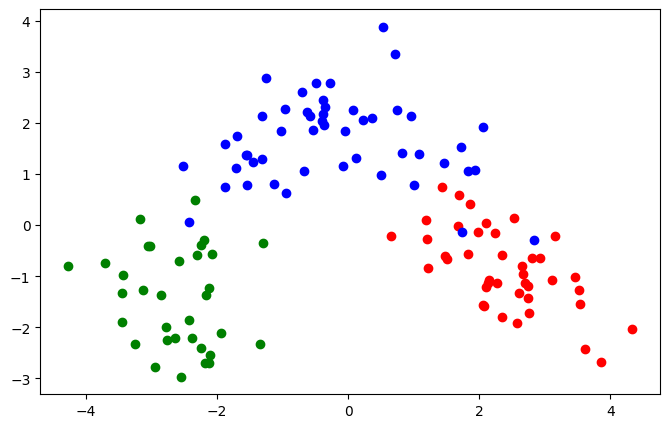

In [82]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
for l, c in zip(np.unique(y_train), 'rbg'):
    ax.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=f'Class {l}')

## PCA in SKLearn

Up to now, we adopted a verbose approach, however SKLearn has already implemented all the previous steps into the class PCA. The class is a transformer.
In this part, we re-run the above steps but this time we use SKLearn class.
Before starting we import a useful function from mlxtend for visualizing the decision region: plot_decision_regions.

In [83]:
from mlxtend.plotting import plot_decision_regions

We apply the fit_transform to the standardized training set getting points into a 2-dimensional space. In this case we can easily plt the decision boundary of the classifier - Logistic Regression in this case - which discriminates the 3 different levels of quality of the wine, aka the classes.

Text(0, 0.5, 'PC2')

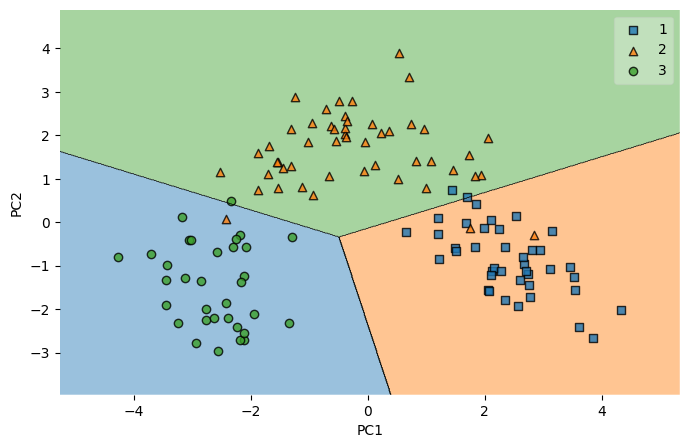

In [84]:
pca = PCA(n_components=2) # we select the number of key dependent variances we want to preserve; 1 - we want select the number of dimension, we don't care about losing the variance
lg_cls = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lg_cls.fit(X_train_pca, y_train)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
plot_decision_regions(X_train_pca, y_train.values, lg_cls, ax=ax)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

#### Accessing feature contribution

The principal components in PCA are linear combination of the original features.
Here we are interested in knowing the contribution of the original features to a given principal component. These contributions are called loadings (the inspection of each eigenvector).

Factor loadings are computed by scaling the eigenvectors by the square of the eigenvalues. The values are the correlations between the original features and the principal component.

In KLEarn we can obtain the eigenvectors assessing the attribute pca.components_, and the eigenvalues by pca.explained_variance_

In [85]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

[Text(0, 0, 'Alcohol'),
 Text(1, 0, 'Malic acid'),
 Text(2, 0, 'Ash'),
 Text(3, 0, 'Alcalinity of ash'),
 Text(4, 0, 'Magnesium'),
 Text(5, 0, 'Total phenols'),
 Text(6, 0, 'Flavanoids'),
 Text(7, 0, 'Nonflavanoid phenols'),
 Text(8, 0, 'Proanthocyanins'),
 Text(9, 0, 'Color intensity'),
 Text(10, 0, 'Hue'),
 Text(11, 0, 'OD280/OD315 of diluted wines'),
 Text(12, 0, 'Proline')]

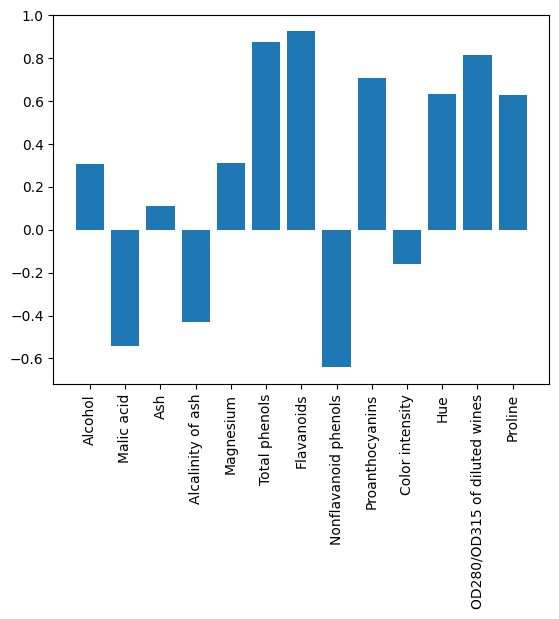

In [86]:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

We compare absolute values. The higher -> the more important.

- LDA technique of the following steps:
    1. Standardize the d-dimensional dataset
    2. For each class compute the d-dimensional mean vector
    3. Construct the between-class scatter matrix S_B and the within-class scatter matrix S_W.
    4. Compute eigenvectors and eigenvalues of $S^{-1}_WS_B$
    5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
    6. Choose the k eigenvectors that correspond to the largest eigenvalues, and build a projection matrix W
    7. Transform the original d-dimensional dataset into a new k-dimensional dataset by applying the projection W.
The steps are similar to PCA but LDA takes into account the class label.
  8. In the following we will see in details these steps by exploiting the basic functions provided by Python.

#### Computing the scatter matrices

For each class i, we compute the mean vector m_i. In the case of Wine dataset we get 3 different mean vectors each for one of the 3 classes.

In [87]:
mean_vectors = [np.mean(X_train_std[y_train == label], axis=0) for label in np.unique(y_train)]

In [88]:
mean_vectors

[array([ 0.89976216, -0.35996329,  0.30103147, -0.74304582,  0.46792414,
         0.91761752,  0.98085519, -0.6287134 ,  0.64032575,  0.20178957,
         0.49581041,  0.76416637,  1.16973167]),
 array([-0.91914645, -0.36134188, -0.36704181,  0.29261151, -0.43620895,
        -0.11871457,  0.00975796,  0.10976533, -0.02351051, -0.85559328,
         0.37199541,  0.23427044, -0.76986063]),
 array([ 0.27475981,  0.99471481,  0.18211516,  0.47982737,  0.07956236,
        -0.9601997 , -1.23342305,  0.61481767, -0.75993424,  1.04564521,
        -1.17963629, -1.30437403, -0.28684748])]

In [89]:
d = X_train_std.shape[1]
S_W = np.zeros((d, d))
for l, mv in zip(np.unique(y_train), mean_vectors):
    scatter4class = np.cov(X_train_std[y_train == 1].T)
    S_W += scatter4class

In [90]:
mean_overall = np.mean(X_train_std, axis=0).reshape(d, 1)
S_B = np.zeros((d, d))
for l, mv in zip(np.unique(y_train), mean_vectors):
    n = X_train_std[y_train == 1].shape[0]
    mv = mv.reshape(d, 1)
    S_B += n * (mv - mean_overall).dot((mv - mean_overall).T)

The following step is similar to PCA.

In [91]:
eigen_vals, eigen_vect = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vect[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

for eigen_val in eigen_pairs:
    print(eigen_val[0])

1917.6238494695756
178.8345834756449
2.0539819556547058e-13
1.9895196601282805e-13
7.13124083042828e-14
5.877222554368888e-14
5.443760762753794e-14
5.443760762753794e-14
5.273401538675562e-14
2.747568722916634e-14
2.747568722916634e-14
1.488084431402408e-14
4.353522453840071e-15


In LDA the number of linear discriminant is at most c - 1, where c is the number of class labels. In fact, we have only c - 1 non zero eigenvalues.
Here we can plot a measure similar to the explained variance ratio, that in this case is called discriminability.

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


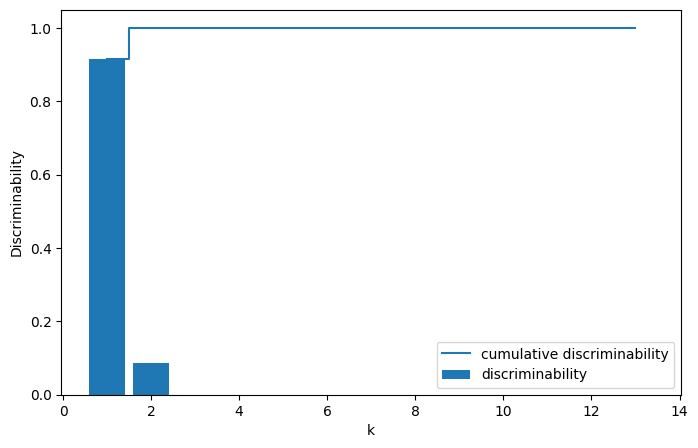

In [92]:
tot = np.sum(eigen_vals)
discr = [lam/tot for lam in sorted(eigen_vals, reverse=True)]
cum_discr = np.cumsum(discr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.bar(range(1, len(eigen_vals) + 1), discr, align='center', label='discriminability')
ax.step(range(1, len(eigen_vals) + 1), cum_discr, where='mid', label='cumulative discriminability')
ax.set_xlabel('k')
ax.set_ylabel('Discriminability')
ax.legend()

Now we can build the projection matrix W and project the original dataest into a lower dimensional space.

In [93]:
W = np.column_stack((eigen_pairs[0][1].real, eigen_pairs[1][1].real))

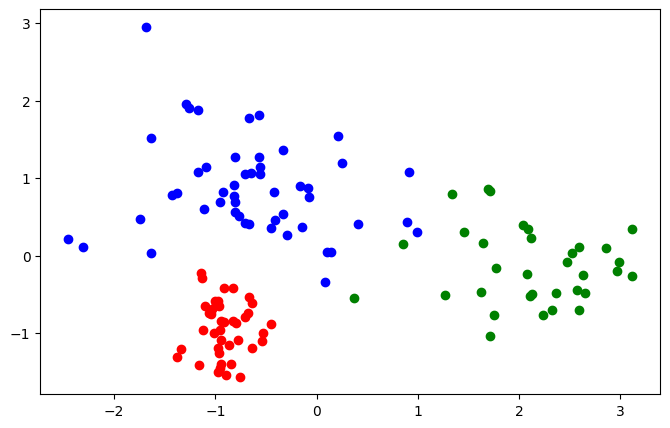

In [94]:
X_train_lda = X_train_std.dot(W)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
for l, c in zip(np.unique(y_train), 'rbg'):
    ax.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1], c=c, label=f'Class {l}')

In SKLearn, LDA is implemented in the class LinearDiscriminantAnalysis

Text(0, 0.5, 'D2')

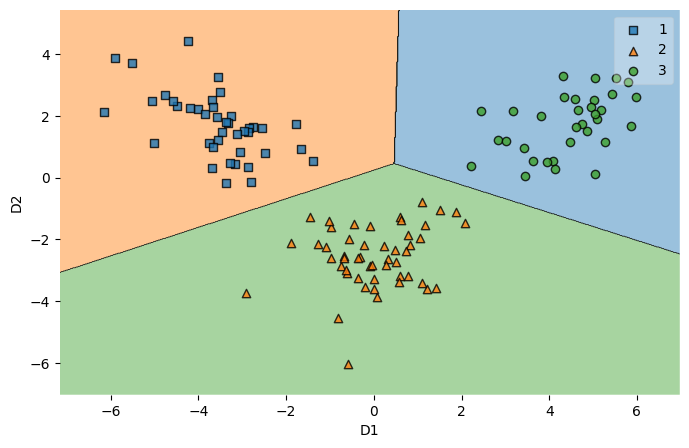

In [95]:
lda = LDA(n_components=2) # n_components is limited by the number of classes we consider, i.e. the limit is # of classes - 1
lg_cls = LogisticRegression()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lg_cls.fit(X_train_lda, y_train)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
plot_decision_regions(X_train_lda, y_train.values, lg_cls, ax=ax)
ax.set_xlabel('D1')
ax.set_ylabel('D2')

n_components is the most important parameter. In PCA, it defines the percentage of information we want to preserve, in LDA it's just dependent on the number of classes.